In [1]:
import keras as ks

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_day.csv')

In [3]:
del data['amount']

In [4]:
data

,time,open,high,low,close,complete
0,2002-05-07 06:00:00,127.920,127.920,127.920,127.920,True
1,2002-05-08 06:00:00,128.920,128.920,128.920,128.920,True
2,2002-05-09 06:00:00,128.380,128.380,128.380,128.380,True
3,2002-05-10 06:00:00,127.630,127.630,127.630,127.630,True
4,2002-05-11 06:00:00,127.620,127.620,127.620,127.620,True
...,...,...,...,...,...,...
5430,2020-02-03 07:00:00,108.432,108.799,108.318,108.683,True
5431,2020-02-04 07:00:00,108.688,109.546,108.550,109.525,True
5432,2020-02-05 07:00:00,109.524,109.848,109.304,109.830,True
5433,2020-02-06 07:00:00,109.824,110.004,109.743,109.996,True


In [5]:
x = np.array(data.iloc[:5434,1:5])

In [6]:
y = np.array(data.iloc[1:,4:5])

In [7]:
x

array([[127.92 , 127.92 , 127.92 , 127.92 ],
       [128.92 , 128.92 , 128.92 , 128.92 ],
       [128.38 , 128.38 , 128.38 , 128.38 ],
       ...,
       [108.688, 109.546, 108.55 , 109.525],
       [109.524, 109.848, 109.304, 109.83 ],
       [109.824, 110.004, 109.743, 109.996]])

In [8]:
y

array([[128.92 ],
       [128.38 ],
       [127.63 ],
       ...,
       [109.83 ],
       [109.996],
       [109.965]])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, test_size=0.2, random_state=42)

In [10]:
from keras.layers import Embedding, MaxPooling1D, Flatten,MaxPooling1D
from keras import models,layers

model = models.Sequential()
model.add(Embedding(256,32,input_length=4))
model.add(layers.Conv1D(filters=32 ,kernel_size = 3, activation='relu'))

model.add(layers.MaxPooling1D())
model.add(layers.Conv1D(filters=8,kernel_size = 1, activation='relu'))

model.add(Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense(1,activation='relu'))

model.compile(optimizer='adam',loss='mse')
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 32)             8192      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 8)              264       
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
______________________________________

In [11]:
history = model.fit(x_train, y_train, epochs= 1200, batch_size= 32,  validation_split=0.2)


Train on 3477 samples, validate on 870 samples
Epoch 1/1200
3477/3477 [==============================] - 1s 399us/step - loss: 11013.8240 - val_loss: 10796.8832
Epoch 2/1200
3477/3477 [==============================] - 0s 133us/step - loss: 10896.6602 - val_loss: 10742.8049
Epoch 3/1200
3477/3477 [==============================] - 1s 157us/step - loss: 10845.6938 - val_loss: 10694.2044
Epoch 4/1200
3477/3477 [==============================] - 0s 133us/step - loss: 10797.7279 - val_loss: 10647.2666
Epoch 5/1200
3477/3477 [==============================] - 0s 131us/step - loss: 10750.9861 - val_loss: 10601.2393
Epoch 6/1200
3477/3477 [==============================] - 1s 150us/step - loss: 10704.9457 - val_loss: 10555.7930
Epoch 7/1200
3477/3477 [==============================] - 0s 129us/step - loss: 10659.3758 - val_loss: 10510.7459
Epoch 8/1200
3477/3477 [==============================] - 0s 133us/step - loss: 10614.1789 - val_loss: 10466.0065
Epoch 9/1200
3477/3477 [================

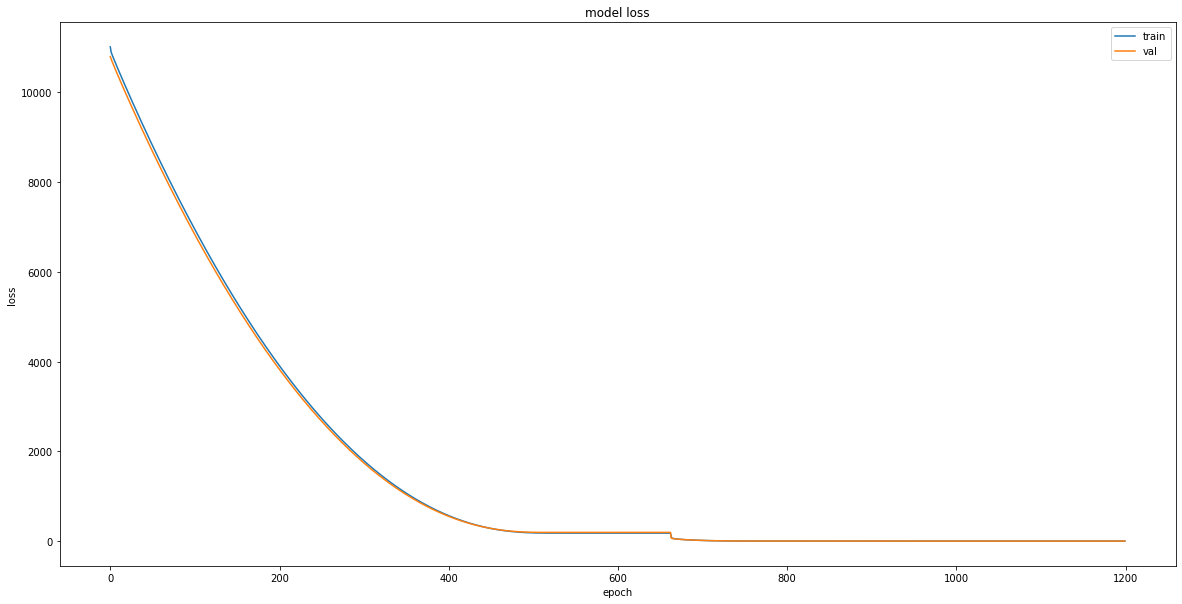

In [15]:
#loss 그래프 그리기
import matplotlib.pyplot as plt
#epochs = range(len(history.history['loss']))
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper right')

plt.show()

In [13]:
test_loss = model.evaluate(x_test, y_test)

1087/1087 [==============================] - 0s 31us/step


In [14]:
test_loss

0.4750260489186565